In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [6]:
rna_polymerase_human = []
for record in SeqIO.parse(r"C:\Users\44797\Documents\Bath\Project\Genetic data\Ebola RNA-dependent RNA polymerase Human.fa", "fasta"):
    rna_polymerase_human.append(list(record.seq))



In [7]:
rna_polymerase_human_sorted = []
for i in rna_polymerase_human:
    # print(set(i))
    if set(i) == set(rna_polymerase_human[0]):
        rna_polymerase_human_sorted.append(i)



In [8]:
x = []
y = []
split_polymerase = int(len(rna_polymerase_human_sorted)/2)
x = rna_polymerase_human_sorted[:split_polymerase]
y = rna_polymerase_human_sorted[(split_polymerase + 1):]
len(x), len(y)


(898, 898)

In [9]:
def one_hot_encoder(A):
    # One hot-encoding 
    encoded = np.array(A)
    label_encoder = LabelEncoder()
    genetic_integer_encoding = label_encoder.fit_transform(encoded)
    # np.unique(genetic_integer_encoding)
    onehot_encoded =OneHotEncoder(sparse=False)
    genetic_integer_encoding = genetic_integer_encoding.reshape(len(genetic_integer_encoding), 1)
    onehot_encoded = onehot_encoded.fit_transform(genetic_integer_encoding)
    # chimp_onehot
    # print(len(chimp_onehot))
    # print(chimp_onehot)
    
    return onehot_encoded

In [10]:
x_hot_encoded = np.zeros((len(x), len(one_hot_encoder(x[0]).flatten()), 1), dtype=int)
y_hot_encoded = np.zeros((len(y), len(one_hot_encoder(y[0]).flatten()), 1), dtype=int)
for i, u in enumerate(x):
    # print(len(one_hot_encoder(u).flatten()))
    # print(i)
    x_hot_encoded[i] = one_hot_encoder(u).reshape(len(one_hot_encoder(x[0]).flatten()), 1)
for dna, m in enumerate(y):
    y_hot_encoded[dna] = one_hot_encoder(m).reshape(len(one_hot_encoder(y[0]).flatten()), 1)


x_train, x_test, y_train, y_test = train_test_split(x_hot_encoded, y_hot_encoded, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=2000)

In [11]:
# y_pred = txt_to_list('pred.txt')
# y_test = txt_to_list('y_test.txt')
len(x_train), len(y_test)

(628, 135)

In [44]:
import difflib

accuracy = []
for seq in range(len(y_pred)):
    similarity = difflib.SequenceMatcher(None, y_pred[seq][2:len(y_pred[0])-3], y_test[seq][2:len(y_pred[0])-3]).ratio()
    accuracy.append(similarity)

mean_error = sum(accuracy)/len(y_pred)
mean_error

0.3142166658298609

In [16]:
#Setup neural network. Feedforward is unlikely.
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(len(x_train), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(len(x_train), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(len(x_train), activation=tf.nn.softmax))

opt = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy']) 

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=4)

Epoch 1/4
20/20 [==============================] - 253s 13s/step - loss: 0.2492 - accuracy: 0.7490 - val_loss: 0.2492 - val_accuracy: 0.7491
Epoch 2/4
20/20 [==============================] - 255s 13s/step - loss: 0.2492 - accuracy: 0.7490 - val_loss: 0.2492 - val_accuracy: 0.7491
Epoch 3/4
20/20 [==============================] - 256s 13s/step - loss: 0.2492 - accuracy: 0.7490 - val_loss: 0.2492 - val_accuracy: 0.7491
Epoch 4/4
20/20 [==============================] - 254s 13s/step - loss: 0.2492 - accuracy: 0.7490 - val_loss: 0.2492 - val_accuracy: 0.7491


In [44]:
train_metrics = history.history
train_metrics
val_acc = train_metrics['val_accuracy']
train_acc = train_metrics['accuracy']

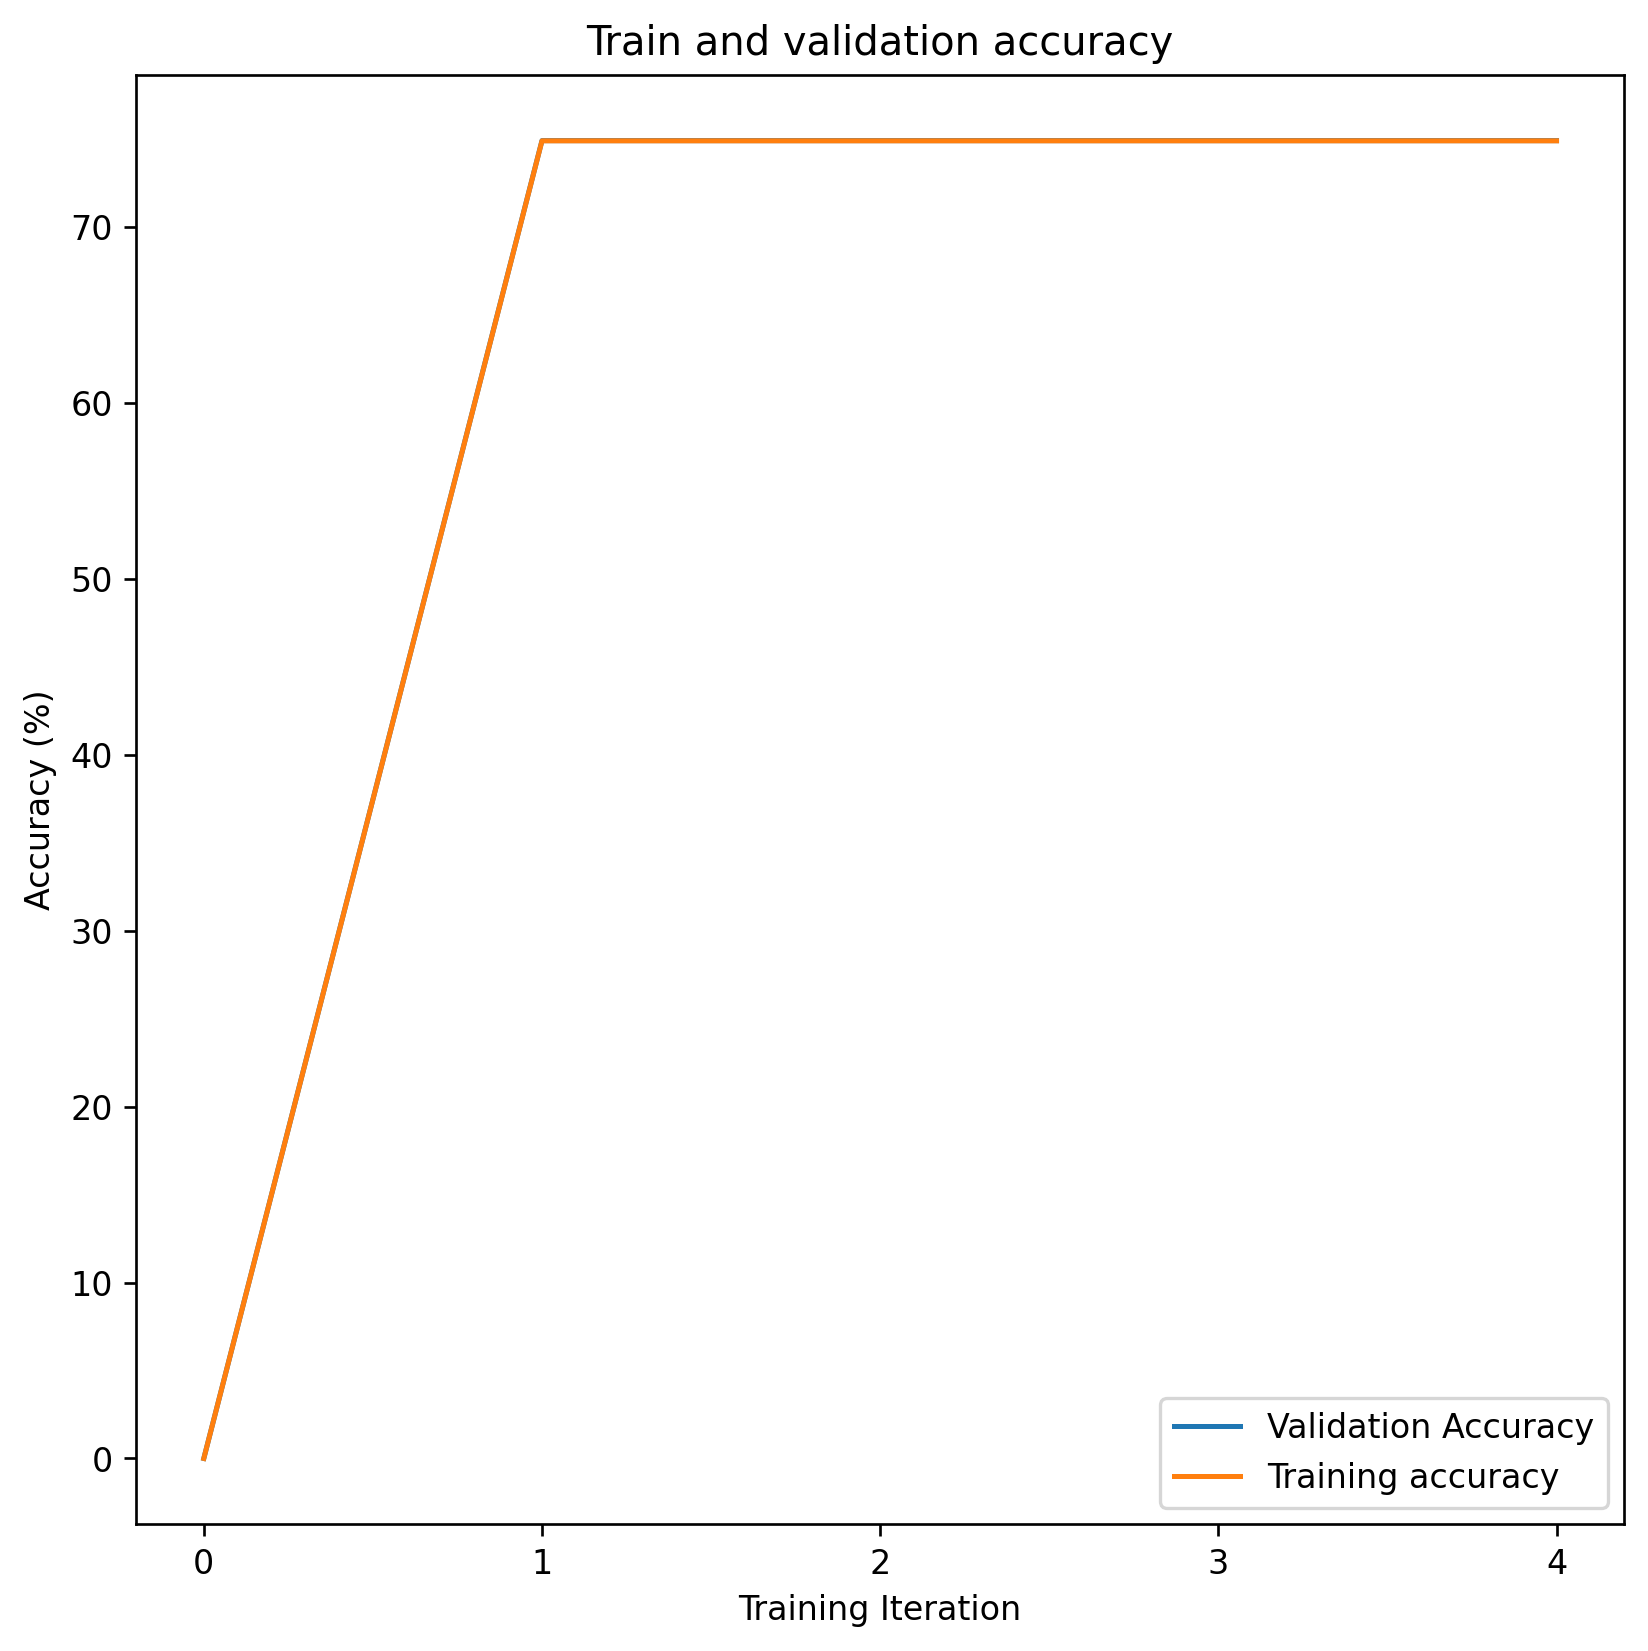

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), dpi=240)
plt.plot([0,1,2,3,4], [j * 100 for j in val_acc[1:]], label='Validation Accuracy')
plt.plot([0,1,2,3,4], [j * 100 for j in train_acc], label='Training accuracy')
plt.legend()
plt.xticks([0,1,2,3,4])
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Train and validation accuracy')
plt.savefig('Keras graph')
plt.show()

In [ ]:
predictions =  model.predict(x_test[:20])

In [18]:
metrics = model.evaluate(x_test, y_test, batch_size=20)

7/7 [==============================] - 17s 2s/step - loss: 0.2492 - accuracy: 0.7494


In [20]:
def list_txt(A, filename):
    with open(filename, 'w') as f:
        for exp in A:
            f.write(str(exp) + '\n')
            
list_txt(metrics, 'Keras metrics.txt')